In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
wine = pd.read_csv("data.csv")
print("data")
wine.head()

data


,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,NaN,0.65,9.8,5.0
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [3]:
print(wine.shape)

(1601, 13)


In [4]:
wine.describe(include='all')

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1601.000000,1600.000000,1601.000000,1600.000000,1601.000000,1598.000000,1600.000000,1600.000000,1600.000000,1600.000000,1601.000000,1601.000000,1600.000000
mean,801.000000,8.319875,0.527742,0.271175,2.538445,0.087487,15.886875,46.520000,0.996746,3.311106,0.658220,10.423204,5.636250
std,462.313206,1.740039,0.178981,0.194745,1.409138,0.047076,10.458487,32.977723,0.001887,0.154338,0.169471,1.065495,0.807368
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,401.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,801.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1201.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.250000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,1601.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
print(wine.isna().sum())

ID                      0
fixed acidity           1
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               3
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64


In [6]:
wine.corr()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
ID,1.000000,-0.268147,-0.009544,-0.153429,-0.031589,-0.119363,0.091197,-0.113913,-0.368825,0.135208,-0.124243,0.245028,0.065846
fixed acidity,-0.268147,1.000000,-0.255570,0.671061,0.114601,0.093544,-0.153049,-0.113356,0.667912,-0.682644,0.182303,-0.061859,0.124831
volatile acidity,-0.009544,-0.255570,1.000000,-0.552917,0.001877,0.060826,-0.010592,0.076249,0.022771,0.235306,-0.261364,-0.202672,-0.390790
citric acid,-0.153429,0.671061,-0.552917,1.000000,0.143518,0.204054,-0.061269,0.036030,0.364309,-0.543019,0.312895,0.109957,0.226906
residual sugar,-0.031589,0.114601,0.001877,0.143518,1.000000,0.055389,0.186797,0.201783,0.355203,-0.085591,0.005668,0.042273,0.013847
chlorides,-0.119363,0.093544,0.060826,0.204054,0.055389,1.000000,0.005593,0.047254,0.200474,-0.265394,0.371113,-0.221390,-0.128652
free sulfur dioxide,0.091197,-0.153049,-0.010592,-0.061269,0.186797,0.005593,1.000000,0.666989,-0.021865,0.069919,0.051711,-0.069606,-0.051634
total sulfur dioxide,-0.113913,-0.113356,0.076249,0.036030,0.201783,0.047254,0.666989,1.000000,0.071067,-0.066825,0.042323,-0.205928,-0.186360
density,-0.368825,0.667912,0.022771,0.364309,0.355203,0.200474,-0.021865,0.071067,1.000000,-0.341436,0.147777,-0.496288,-0.174483
pH,0.135208,-0.682644,0.235306,-0.543019,-0.085591,-0.265394,0.069919,-0.066825,-0.341436,1.000000,-0.196542,0.205533,-0.058157


In [7]:
wine.groupby('quality').mean()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,
3.0,1053.300000,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4.0,797.000000,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5.0,743.381791,8.163382,0.577100,0.243544,2.528414,0.092763,17.020588,56.697059,0.997099,3.305118,0.621189,9.899853
6.0,848.690141,8.345383,0.497316,0.274085,2.477387,0.084944,15.721440,40.881064,0.996612,3.318044,0.675587,10.630882
7.0,832.195980,8.872362,0.403920,0.375176,2.720603,0.076667,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8.0,826.777778,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


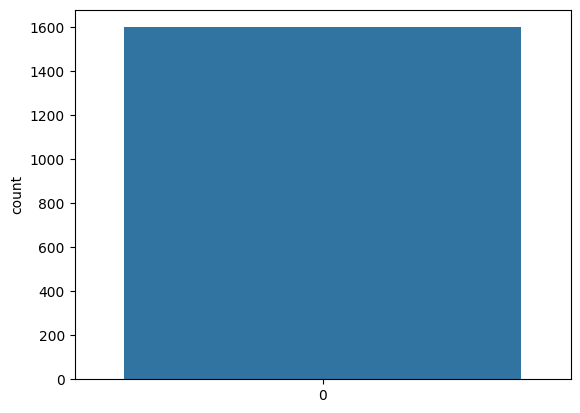

In [8]:
sns.countplot(wine['quality'])
plt.show()

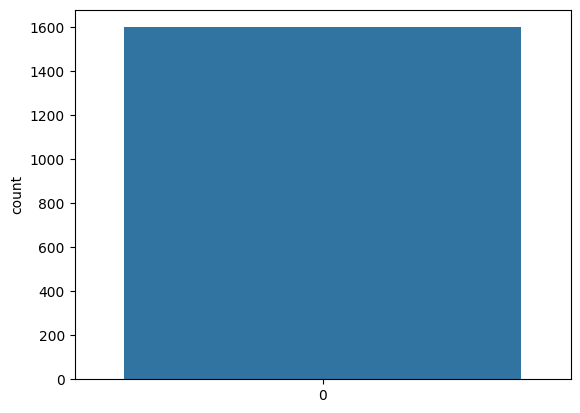

In [9]:
sns.countplot(wine['pH'])
plt.show()

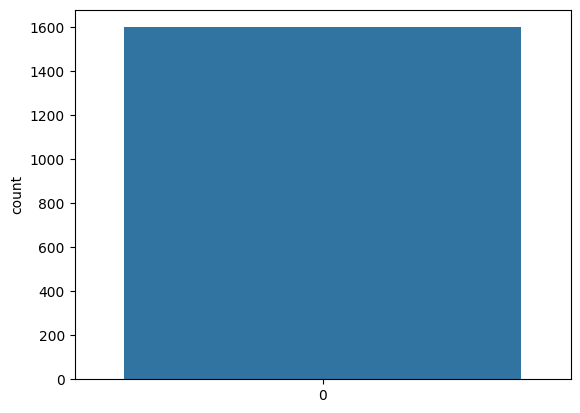

In [10]:
sns.countplot(wine['alcohol'])
plt.show()

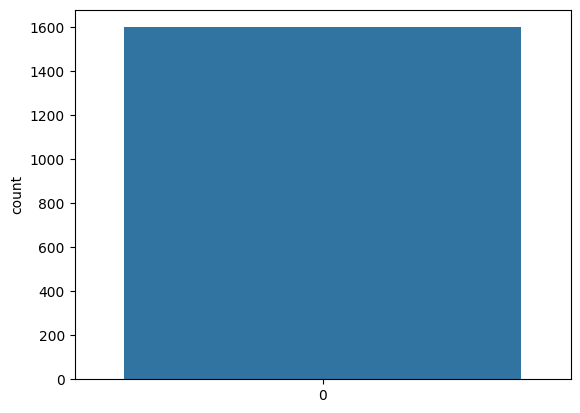

In [11]:
sns.countplot(wine['fixed acidity'])
plt.show()

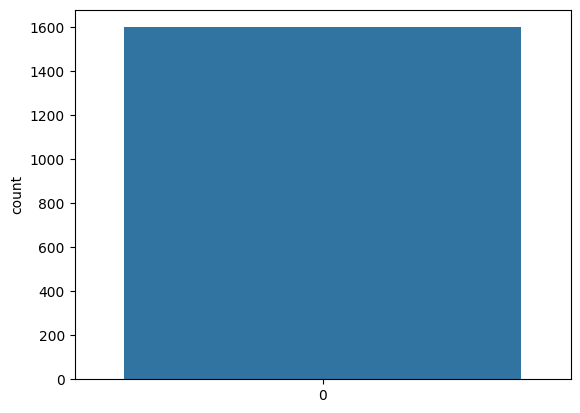

In [12]:
sns.countplot(wine['volatile acidity'])
plt.show()

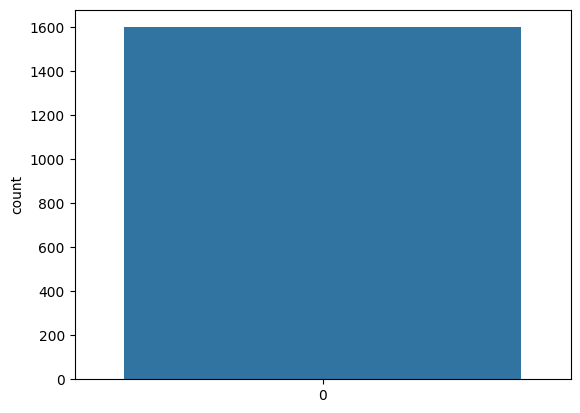

In [13]:
sns.countplot(wine['citric acid'])
plt.show()

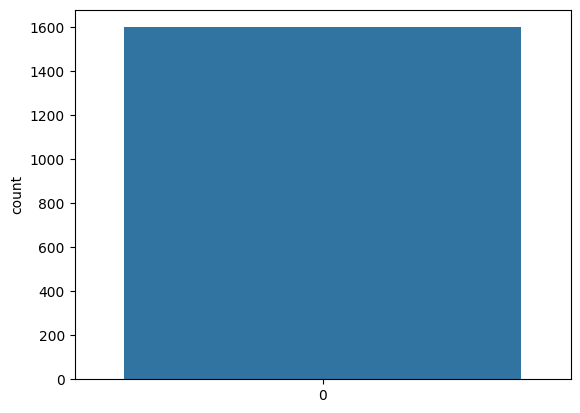

In [14]:
sns.countplot(wine['density'])
plt.show()

<Axes: xlabel='quality', ylabel='Density'>

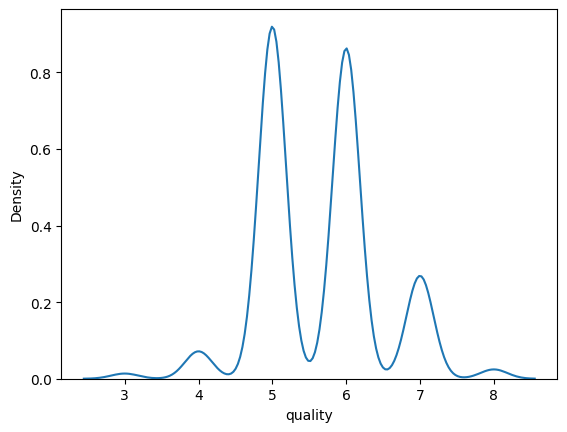

In [15]:
sns.kdeplot(wine.query('quality > 2').quality)

<Axes: xlabel='alcohol', ylabel='Density'>

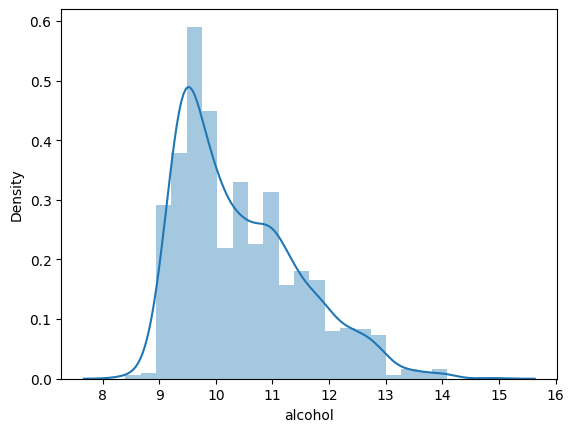

In [16]:
sns.distplot(wine['alcohol'])

ID                         Axes(0.125,0.712609;0.168478x0.167391)
fixed acidity           Axes(0.327174,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.529348,0.712609;0.168478x0.167391)
citric acid             Axes(0.731522,0.712609;0.168478x0.167391)
residual sugar             Axes(0.125,0.511739;0.168478x0.167391)
chlorides               Axes(0.327174,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.529348,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.731522,0.511739;0.168478x0.167391)
density                     Axes(0.125,0.31087;0.168478x0.167391)
pH                       Axes(0.327174,0.31087;0.168478x0.167391)
sulphates                Axes(0.529348,0.31087;0.168478x0.167391)
alcohol                  Axes(0.731522,0.31087;0.168478x0.167391)
quality                        Axes(0.125,0.11;0.168478x0.167391)
dtype: object

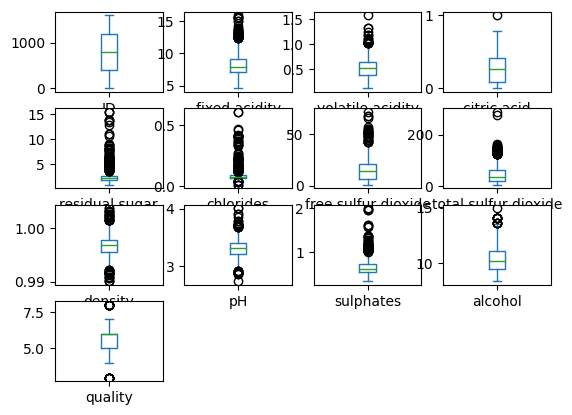

In [17]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

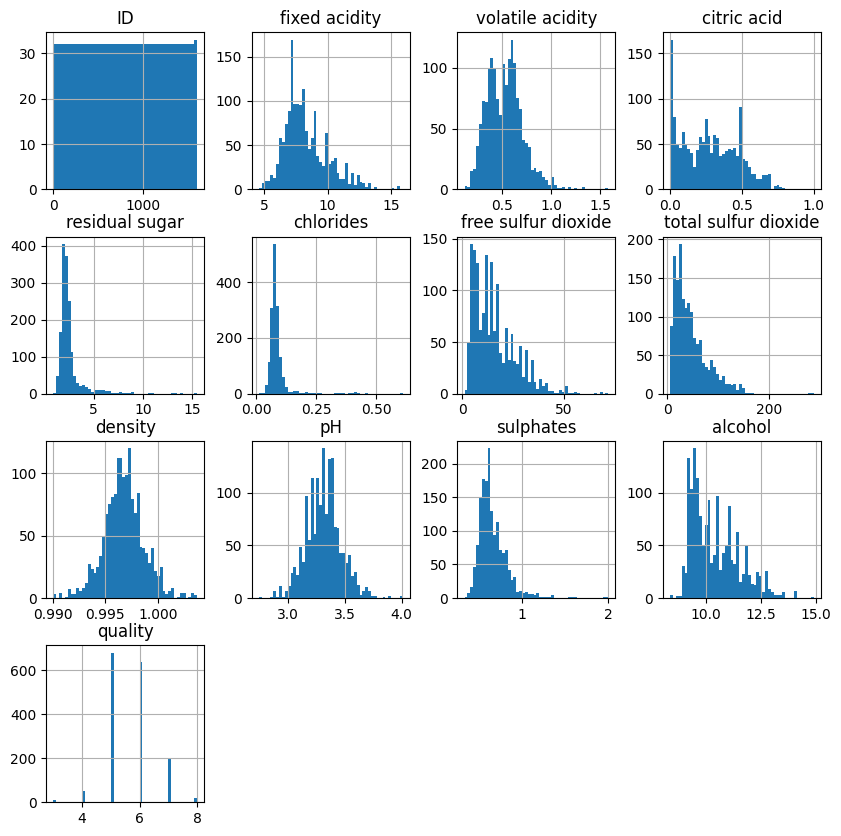

In [19]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: >

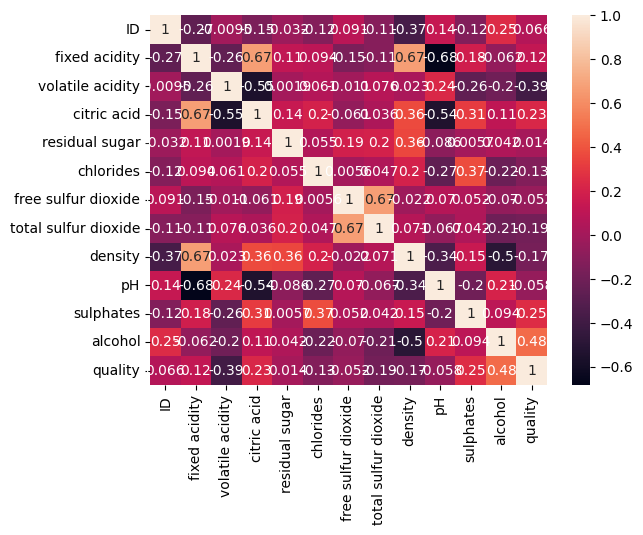

In [20]:
corr = wine.corr()
sns.heatmap(corr,annot=True)

<Axes: xlabel='quality', ylabel='alcohol'>

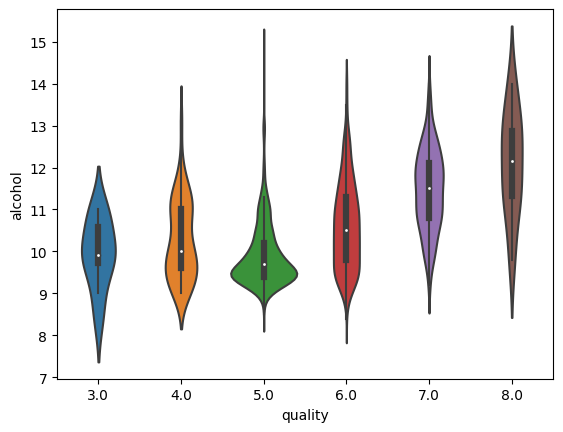

In [22]:
sns.violinplot(x='quality', y='alcohol', data=wine)

In [23]:
# Create Classification version of target variable
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]# Separate feature variables and target variable
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [24]:
# See proportion of good vs bad wines
wine['goodquality'].value_counts()

0    1384
1     217
Name: goodquality, dtype: int64

In [25]:
X

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,NaN,0.65,9.8
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1596,1597,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,1598,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1598,1599,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
1599,1600,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0


In [26]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1596    0
1597    0
1598    0
1599    0
1600    0
Name: goodquality, Length: 1601, dtype: int64
